# Energía cinética

[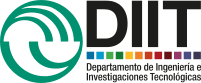](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)

---

## Definición
La energía cinética de una partícula puntual de masa $m$ es 
$$
T= \frac{m}{2} \left(\dot{\vec{r}}\right)^2 = \frac{m}{2} \left(\dot{\vec{r}} \cdot \dot{\vec{r}}\right) = \frac{m}{2} \left(\dot{r_i}^2+ \dot{r_j}^2+ \dot{r_k}^2 \right), 
$$
la triada de versores Por ejemplo en un sistema de coordenadas cartesianas
$$
T= \frac{m}{2} \left(\dot{x}^2+ \dot{y}^2+ \dot{z}^2 \right) .
$$

## ¿Cómo escribimos esto en un código Python?
Recordemos que Python es un lenguage interactivo por lo podemos ejecutar parte de un programa, revisar y modificar variables y ejecutar luego otras partes.
Esto se desarrolla en una _sesión_ que comienza al iniciar el _intérpete_ interactivo hasta borrar los contenidos de memoria.

Lo primero que vamos a ejecutar en una sesión es el _importar_ las bibliotecas de funciones para mecánica, la parte de la física que nos ocupa en esta asignatura. 

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

Usaremos funciones para definir un marco de referencias en coordenadas cartesianas y las variable pertinente para las posición de una partícula puntual de masa $m_1$.
Ubicaremos tal partícula sobre el eje $x$ lo permite determinar su posición solo con una, $x$,
$$
\begin{aligned}
\vec{r}_1 
&= x \hat{e}_x.
\end{aligned}
$$

In [2]:
m1 = sym.symbols('m_1', positive=True) # las masas son siempre positivas
e = mech.ReferenceFrame('e') # marco referencial o en coordenadas cartesianas
x = mech.dynamicsymbols('x') # x cambiara con el tiempo, por tanto es una variable dinámica

In [3]:
m1_r = x* e.x
m1_r

[Python](https://www.python.org/), como cualquier otro lenguaje de programación es capaz hacer cuentas como una calculadora.
Esto se llama cálculo numérico.
En contrapartida, la biblioteca [SymPy](https://www.sympy.org/en/index.html) permite operar en forma simbólica habilitando resolver cuestiones de análisis y álgebra.
Por ejemplo permite derivar en función del tiempo las posición de la partícula de masa $m_1$
$$
\dot{\vec{r}}_1 = \dot{x} \hat{x}
$$

In [4]:
m1_v= m1_r.dt(e) # deriva respecto a t en el sistema de referencia e
m1_v

Como las velocidades son vectores es práctico calcular el cuadrado de las velocidades usando el producto escalar llamado también producto punto (dot en inglés)
$$
\left( \dot{\vec{r}} \right)^2 = \dot{\vec{r}} \cdot \dot{\vec{r}} .
$$

In [5]:
# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros
m1_T = unMedio* m1* m1_v.dot(m1_v)
T = sym.Eq(sym.Symbol('T'), m1_T ) # Eq define una ecuación
T

### Sistema de N partículas

Para obtener la $T$ de un sistema hay $N$ partículas se suman todas sus $T$. E.g. para un sistema con dos partículas
$$
T = \sum_{i=1}^{N=2} \frac{m_i}{2} \left( \dot{\vec{r}}_i \right)^2 = \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 .
$$

In [17]:
# Parámetros físicos del sistema, i.e. las masas
m1, m2 = sym.symbols('m_1, m_2', positive=True) # las masas son siempre positivas

# Posiciones
E = mech.ReferenceFrame('e')
x1, x2 = mech.dynamicsymbols('x_1, x_2')
m1_r = x1* e.x # m1_r : para la masa 1 su posición r
m2_r = x2* e.x 

# Velocidades
m1_v= m1_r.dt(e)
m2_v= m2_r.dt(e)

# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m1_T = unMedio* m1* m1_v.dot(m1_v) # un medio de la masa por la velocidad al cuadrado
m2_T = unMedio* m2* m2_v.dot(m2_v)
T = sym.Eq(sym.Symbol('T'), m1_T + m2_T ) # Eq define una ecuación
T

Se termina reiterando la escritura de líneas de codigo idénticas, algo que puede evitarse en cualquier lenguaje de programación.

### La ley del menor esfuerzo: programar para trabajar menos

Hay **dos partículas** en el sistema.
Se escribió **dos veces** los mismos comandos para calcular sus velocidades, sus cuadros y con estos sus energías cinéticas.
Una repetición innecesaria puesto que se tiene a disposición un lenguaje de programación general como Python.

Basta **definir una función** que calcule la energía cinética indicando en ella:
- entradas: masa \\(m\\) y posición de la partícula \\(\vec{r}\\) en un determinado marco de referencia 
- procesos intermedios que deba hacer a partir de las entradas para cálcular la energía cinética como \\(\frac{m}{2} \dot{r}^2\\)
- salida: lo que **retornará**, que se escribe tras la sentencia 
```Python
return
```

La celda inferior contiene el código que define la función `energíaCinéticaPartícula`.
Entre triples comillas dobles se puede incluir un comentario para explicar que hace la función definida.

In [18]:
def energíaCinéticaPartícula(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Multiplicación de símbolos Sympy (sympy.core.mul.Mul)
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    # velocidad = posición.diff(t, marcoDeReferencia)
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    return unMedio* masa* velocidad.dot(velocidad)

Así para la particula de masa `m1` cuya posición es `m1_r` en el marco de referencia `e` se obtiene que 

In [19]:
T_m1 = energíaCinéticaPartícula(m1, m1_r, e)
T_m1

Aplicando la función al problema de las dos partículas de masas `m1` y `m2` esto es

In [21]:
# Energía cinética del sistema
T_m1 = energíaCinéticaPartícula(m1, m1_r, e)
T_m2 = energíaCinéticaPartícula(m2, m2_r, e)
sym.Eq(sym.Symbol('T'), T_m1 + T_m2 ) 

Con todo lo visto se pueden resolver los problemas que figuran en la guía de ejercicios. 

Como referencia resolveremos a continuación uno de estos.

## Un ejercicio hecho desde el principio | Péndulo con punto de suspensión libre

> Bibliografía:
>- Sección 5 ($\S 5$) Ejercicio 2  
Mecánica  
Lev Davidovich Landau, y E. M. Lifshitz  
Reverté, 1994

### Enunciado

Péndulo plano de masa \\(m_2\\), cuyo punto de suspensión (de masa \\(m_1\\)) puede desplazarse en el mismo plano sobre una recta horizontal.

La cuerda que une las partículas de masas $m_1$ y $m_2$ se considera rígida (no se dobla) y por tanto mantiene una distancia constante de $
\ell$ entre ambas.

Escriba la energía cinética, \\(T\\) en función de las coordenadas indicadas por las figura: $x, \phi$.

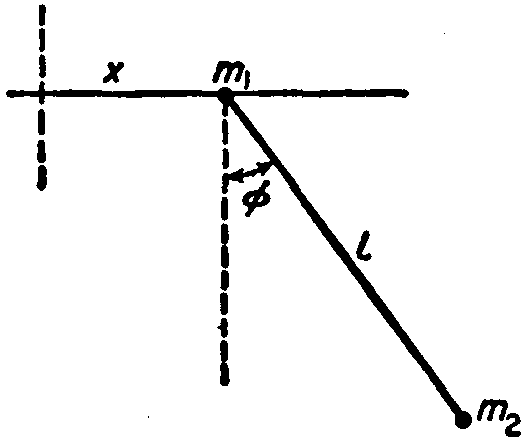

### Resolución

In [10]:
# Importar funciones de mecánica de SymPy.
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [11]:
# Establece sistema de referencia
e = mech.ReferenceFrame('e') # marco referencial o en coordenadas cartesianas
phi = mech.dynamicsymbols(r'\phi') # phi cambiara con el tiempo, por tanto es una variable dinámica

In [12]:
# posición de primer partícula
x = mech.dynamicsymbols('x') # x cambiara con el tiempo, por tanto es una variable dinámica
m1_r = x* e.x # posición de la partícula de masa m1
m1_r

La partícula de masa $m_2$ mantiene siempre una separación de $\ell$ respecto a la de $m_1$.
Su posición se define a partir de la esta.
Solo hay que hacer la proyección en el sistema de referencia en función de la coordenada $\varphi$,
$$
\begin{aligned}
\vec{r}_2 
&= \vec{r}_1 + \ell \left( \sin{(\phi)} \hat{x} +  \cos{(\phi)} (- \hat{y}) \right) \\
&= \left( \ell \sin{(\phi)} + x \right) \hat{x} -\ell \cos{(\phi)}  \hat{y}.
\end{aligned}
$$

Describir las posiciones en función de la geometría es el **precedimiento central** para la resolución de este problema. 

La lóngitud del péndulo $\ell$ es un parámetros físico del sistema **inmutable** con el transcurrir del tiempo.
Lo mismo sucede con la masas de las partículas.
**No son variables** por lo que no tiene sentido declararles como tales, pero son **símbolos** con los que el código debe ser capaz de operar.

In [23]:
# Defino los parámetros físicos del sistema
m1, m2, l = sym.symbols('m_1, m_2, \ell', positive=True) # Escribirlos tras el subguión hace que los números aparezcan como subíndices. 

Declarar $\phi$ como variable y hacer uso de las funciones trigonométricas de SymPy permite escribir la posición de la partícula de masa $m_2$.

In [26]:
# posición de la segunda partícula
phi = mech.dynamicsymbols('phi')
m2_r = m1_r + l*( sym.sin(phi)* e.x + sym.cos(phi)* (-e.y) )  # y versor apunta hacia arriba
m2_r

In [27]:
# Energía cinética del sistema
T_m1 = energíaCinéticaPartícula(m1, m1_r, e)
T_m2 = energíaCinéticaPartícula(m2, m2_r, e)
T = (T_m1 + T_m2).simplify()
sym.Eq(sym.Symbol('T'), T ) # simplify: simplifica usando factor común y otras operaciones

Como puede verse el mayor esfuerzo que insume la resolución del problema es describir la posición de las partículas en función de la geometría del sistema.

### Trabajo ahorrado: cálculo de velocidad

El ejercicio está terminado con lo anterior. A continuación se mostrarán todos los cálculos que nos ahorramos por haberlos dejado en manos de `SymPy`.

In [28]:
m1_v= m1_r.dt(e) # diff: deriva respecto a t en el sistema de referencia N
m1_v

Y para la derivida de la posición de la partícula de masa $m_2$,
$$
\dot{\vec{r}}_2 = \left( \ell \cos{(\varphi)} \dot{\varphi} + \dot{x} \right) \hat{x} + \ell \sin{(\varphi)} \dot{\varphi}  \hat{y} ,
$$
Sympy aplica correctamente la regla de la cadena en las funciones trigonométricas.

In [29]:
m2_v= m2_r.dt(e)
m2_v

Y ahora con estos $\left( \dot{\vec{r}}_i \right)^2$
$$
\left(\dot{\vec{r}}_1 \right)^2 = \dot{\vec{r}}_1 \cdot \dot{\vec{r}}_1 = \dot{x}^2
$$

In [30]:
# velocidades al cuadrado es decir producto punto con si mismo
m1_v_cuadrado = m1_v.dot(m1_v)
m1_v_cuadrado

$$
\begin{aligned}
\left(\dot{\vec{r}}_2 \right)^2= \dot{\vec{r}}_2 \cdot \dot{\vec{r}}_2 
&= \left( \dot{x} + \ell \cos{\varphi} \dot{\varphi} \right)^2 + \left( \ell \sin{\varphi} \dot{\varphi} \right)^2 \\
&= \left( \dot{x}^2 + 2 \dot{x}_1 \ell \cos{\varphi} \dot{\varphi} + \ell^2 \cos^2{\varphi} \dot{\varphi}^2 \right) + \left( \ell^2 \sin^2{\varphi} \dot{\varphi}^2 \right) \\
&= \dot{x}^2 + 2 \dot{x}_1 \ell \cos{\varphi} \dot{\varphi} + \ell^2 \dot{\varphi}^2 . 
\end{aligned}
$$

In [31]:
m2_v_cuadrado = m2_v.dot(m2_v)
m2_v_cuadrado

Esta última expresión puede hacerse más clara expandiendo el cuadrado de lo que está en paréntesis y aprovechando la identidad de la suma del cuadrados de senos y cosenos. 

In [32]:
m2_v_cuadrado.simplify()

Pero todo esto un alumno que cursa esta asignatura ya lo ha demostrado sabe hacerlo al aprobar sus correlativas.
Así como una calculadora de bolsillo el utilizar ahorra el tiempo que insumiría realizar manualmente la aritmética aprendida en la escuela primaria, la biblioteca `SymPy` hace lo propio en relación al álgebra y análisis simbólico.